# Hanning filter GPU vs CPU

In [1]:
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


## Load files

In [2]:
cpu_loopy_results = xr.open_dataset('/mnt/summer/DATA_MEOM/workdir/ABL1D-JAX/jax_hanning_cpu_loopy.nc')
cpu_loopy_results

<xarray.Dataset> Size: 8MB
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    blh_smoox  (latitude, longitude) float32 4MB ...
    msk        (latitude, longitude) float32 4MB ...

In [4]:
gpu_results = xr.open_dataset('/mnt/summer/DATA_MEOM/workdir/ABL1D-JAX/jax_hanning_gpu.nc')
gpu_results

<xarray.Dataset> Size: 4MB
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    blh_smoox  (latitude, longitude) float32 4MB ...

In [5]:
fortran_results = xr.open_dataset('/mnt/summer/DATA_MEOM/workdir/ABL1D-JAX/smooth.nc')
fortran_results = fortran_results.isel(time_counter=0)
fortran_results = fortran_results.assign_coords({
    'y' :gpu_results.latitude.values,
    'x':gpu_results.longitude.values,
}).rename({'y':'latitude','x':'longitude'})
fortran_results

<xarray.Dataset> Size: 17MB
Dimensions:       (latitude: 721, longitude: 1440)
Coordinates:
  * latitude      (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude     (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
Data variables:
    degraded_blh  (latitude, longitude) float64 8MB ...
    lsm           (latitude, longitude) float64 8MB ...

## Plot

In [6]:
vmin, vmax = 0, 3000

### JAX code on CPU

Text(0.5, 1.0, 'JAX CPU debug')

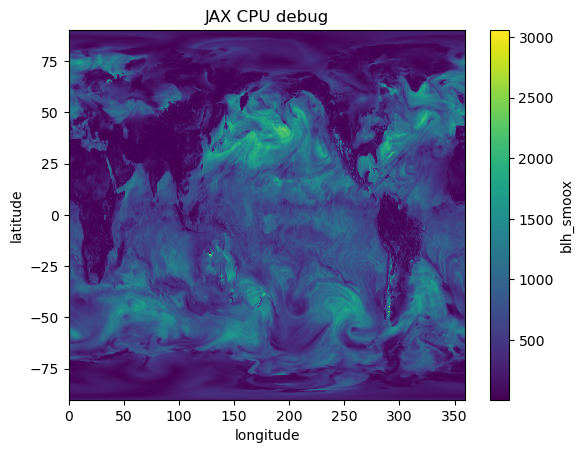

In [8]:
ax = plt.axes()
cpu_loopy_results.blh_smoox.plot(ax=ax)
ax.set_title('JAX CPU debug')

Text(0.5, 1.0, 'JAX CPU debug')

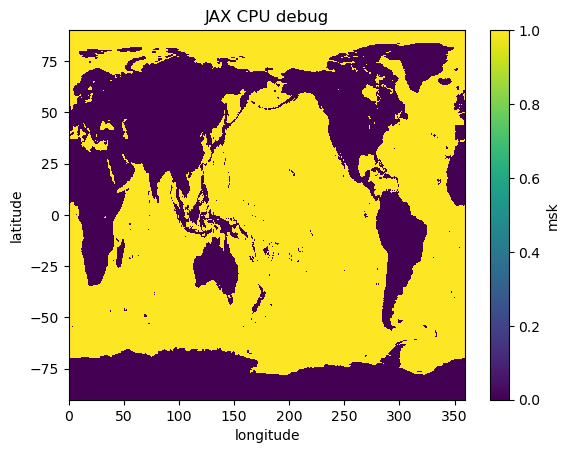

In [7]:
ax = plt.axes()
cpu_loopy_results.msk.plot(ax=ax)
ax.set_title('JAX CPU debug mask')

### JAX code on GPU

In [ ]:
ax = plt.axes()
gpu_results.blh_smoox.plot(ax=ax, vmin=vmin, vmax=vmax)
ax.set_title('JAX GPU')

### Fortran code

Text(0.5, 1.0, 'Fortran')

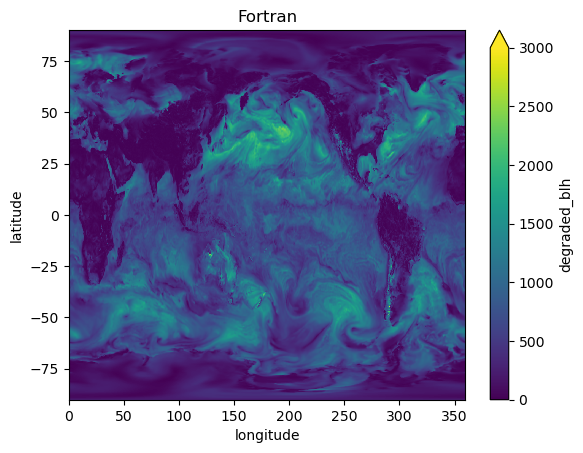

In [9]:
ax = plt.axes()
fortran_results.degraded_blh.plot(ax=ax, vmin=vmin, vmax=vmax)
ax.set_title('Fortran')

Text(0.5, 1.0, 'Fortran mask field')

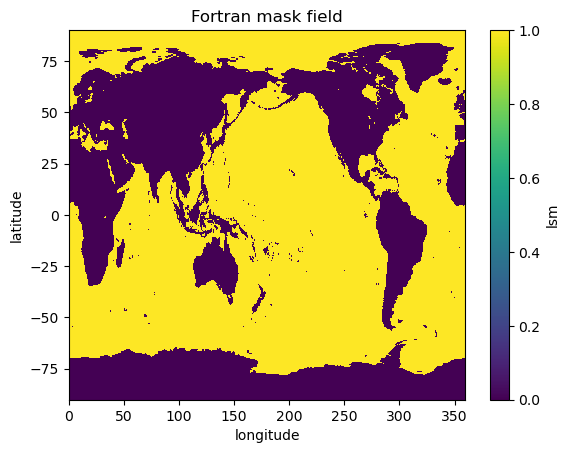

In [10]:
ax = plt.axes()
fortran_results.lsm.plot(ax=ax, vmin=vmin)
ax.set_title('Fortran mask field')

### CPU vs GPU

In [ ]:
ax = plt.axes()
(cpu_results.blh_smoox - gpu_results.blh_smoox).plot(ax=ax, vmin=-1e-2, vmax=1e-2)
ax.set_title('CPU - GPU')

In [ ]:
ax = plt.axes()
(cpu_results.blh_smoox - cpu_mask_results.blh_smoox).plot(ax=ax, vmin=-1e-2, vmax=1e-2)
ax.set_title('CPU - CPU(mask)')

### Fortran vs GPU (no mask fix)

In [ ]:
ax = plt.axes()
diff = fortran_results.degraded_blh - gpu_results.blh_smoox
pc_diff = diff / gpu_results.blh_smoox
diff.plot(ax=ax, vmin=-1, vmax=1)
ax.set_title('Fortran - GPU')

### Fortran mask vs Python mask

Text(0.5, 1.0, 'Fortran mask - python mask')

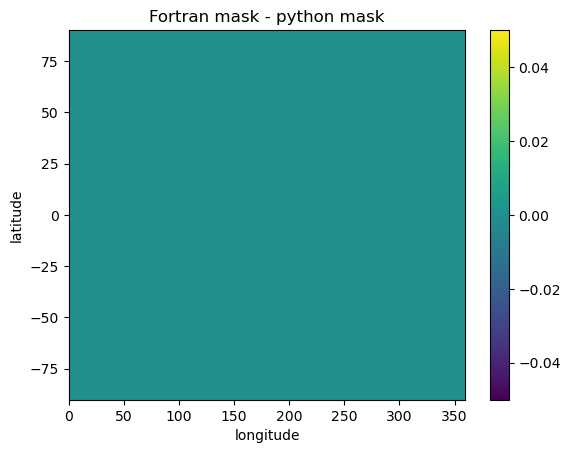

In [12]:
ax = plt.axes()
diff = fortran_results.lsm - cpu_loopy_results.msk
diff.plot(ax=ax)#, vmin=-1, vmax=1)
ax.set_title('Fortran mask - python mask')

In [ ]:
ax = plt.axes()
diff = fortran_results.degraded_blh - cpu_mask_results.blh_smoox
diff.plot(ax=ax, vmin=-1, vmax=1)
ax.set_title('Fortran - CPU(mask)')

In [ ]:
diff = fortran_results.degraded_blh - cpu_mask_results.blh_smoox
print(f'max diff ={diff.max().values}, min diff = {diff.min().values}')

### Fortran vs debugged Python

Text(0.5, 1.0, 'Fortran - CPU(debug)')

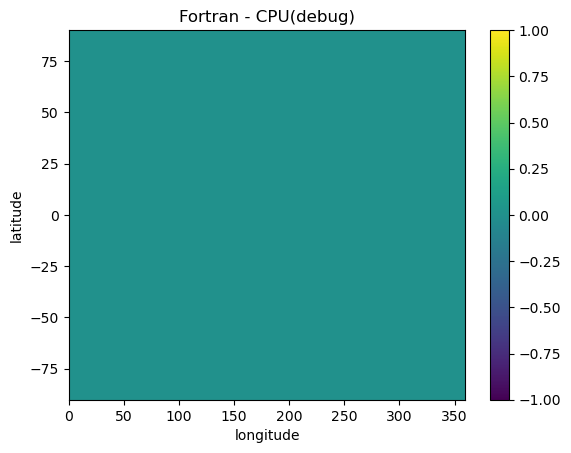

In [13]:
ax = plt.axes()
diff = fortran_results.degraded_blh - cpu_loopy_results.blh_smoox
diff.plot(ax=ax, vmin=-1, vmax=1)
ax.set_title('Fortran - CPU(debug)')

In [14]:
diff = fortran_results.degraded_blh - cpu_loopy_results.blh_smoox
print(f'max diff ={diff.max().values}, min diff = {diff.min().values}')

max diff =0.0, min diff = 0.0
